#  Reinforcement Learning: Q Learning for CliffWalking

In [25]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [27]:
#Helper functions:

def determine_policy_from_Q(Q):
    """Derive policy from Q-values."""
    return np.argmax(Q, axis=1)

def visualize_policy_execution(env, policy, episodes=5):
    """Visualize the policy execution for CliffWalking."""
    action_names = ["UP", "RIGHT", "DOWN", "LEFT"]
    
    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        steps = 0
        done = False
        
        while not done:
            # Render environment
            frame = env.render()
            plt.imshow(frame)
            plt.axis('off')
            plt.title(f'Episode {episode + 1}, Steps: {steps}\nAction: {action_names[policy[state]]}')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.pause(0.5)  # Longer pause to see movements clearly
            
            action = policy[state]
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            state = next_state
            total_reward += reward
            steps += 1
        
        print(f"Episode {episode + 1}: Steps = {steps}, Total Reward = {total_reward}")
        plt.close()

In [26]:
def Q_learning(env, n_episodes=5000, learning_rate=0.1, gamma=0.99, epsilon_decay=0.995, min_epsilon=0.01):
    """Q-Learning algorithm for CliffWalking."""
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))
    epsilon = 1.0
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            
            # Take action and observe result
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Update Q-value
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action] * (not done)
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error
            
            state = next_state
            total_reward += reward
        
        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        episode_rewards.append(total_reward)
        
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episode {episode + 1}, Average Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")
    
    return Q

In [28]:
# Create the CliffWalking environment
env = gym.make('CliffWalking-v0', render_mode="rgb_array")

try:
    print("Training agent using Q-Learning...")
    Q = Q_learning(env)
    
    print("\nDeriving optimal policy from Q-values...")
    optimal_policy = determine_policy_from_Q(Q)
    
except Exception as e:
    print(f"An error occurred: {e}")
    raise e

Training agent using Q-Learning...
Episode 100, Average Reward (last 100): -9826.04, Epsilon: 0.606
Episode 200, Average Reward (last 100): -390.56, Epsilon: 0.367
Episode 300, Average Reward (last 100): -148.57, Epsilon: 0.222
Episode 400, Average Reward (last 100): -89.96, Epsilon: 0.135
Episode 500, Average Reward (last 100): -58.11, Epsilon: 0.082
Episode 600, Average Reward (last 100): -29.94, Epsilon: 0.049
Episode 700, Average Reward (last 100): -28.24, Epsilon: 0.030
Episode 800, Average Reward (last 100): -20.66, Epsilon: 0.018
Episode 900, Average Reward (last 100): -18.33, Epsilon: 0.011
Episode 1000, Average Reward (last 100): -20.40, Epsilon: 0.010
Episode 1100, Average Reward (last 100): -14.23, Epsilon: 0.010
Episode 1200, Average Reward (last 100): -18.35, Epsilon: 0.010
Episode 1300, Average Reward (last 100): -22.87, Epsilon: 0.010
Episode 1400, Average Reward (last 100): -19.45, Epsilon: 0.010
Episode 1500, Average Reward (last 100): -18.45, Epsilon: 0.010
Episode 16

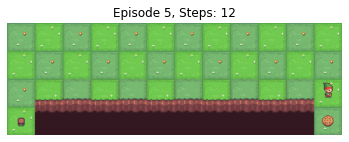

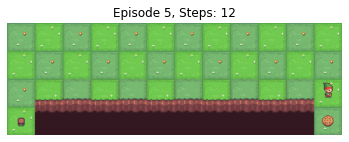

Episode 5: Success! Steps: 13

Environment closed.


In [31]:
# Visualize the trained policy
try:
    print("\nVisualizing policy execution...")
    def visualize_policy_execution(env, policy, episodes=5):
        """Visualize the policy execution for CliffWalking."""
        for episode in range(episodes):
            state, _ = env.reset()
            total_reward = 0
            steps = 0
            done = False
            
            while not done:
                # Render environment
                frame = env.render()
                plt.imshow(frame)
                plt.axis('off')
                plt.title(f'Episode {episode + 1}, Steps: {steps}')
                display.clear_output(wait=True)
                display.display(plt.gcf())
                plt.pause(0.5)
                
                action = policy[state]
                next_state, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated
                
                state = next_state
                total_reward += reward
                steps += 1
            
            # Print result
            result = "Success!" if total_reward > -100 else "Failed!"
            print(f"Episode {episode + 1}: {result} Steps: {steps}")
            plt.close()

    visualize_policy_execution(env, optimal_policy)
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    env.close()
    print("\nEnvironment closed.")